# Salary Prediction Classification | XAI Project

Maxim Lichko<br>
Alexey Demchuk

## 1. Introduction

The task of predicting whether an individual earns more than $50,000 per annum constitutes a significant and socially relevant application of machine learning. The dataset in question encompasses a diverse array of demographic, occupational, and socio-economic variables, making it well-suited for the application of advanced analytical techniques.

Nevertheless, the sensitive nature of this domain—where predictive outcomes intersect with attributes such as race, gender, and education—necessitates not only predictive accuracy but also a high degree of model transparency and interpretability. Consequently, this work places strong emphasis on the use of explainable artificial intelligence (XAI) methods.

Prediction task is to determine whether a person makes over 50K a year.<br>
Kaggle dataset: [link](https://www.kaggle.com/datasets/ayessa/salary-prediction-classification#)

__Columns:__

* __age:__ continuous.
* __workclass:__ Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt:__ continuous.
* __education:__ Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num:__ continuous.
* __marital-status:__ Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation:__ Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship:__ Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race:__ White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex:__ Female, Male.
* __capital-gain:__ continuous.
* __capital-loss:__ continuous.
* __hours-per-week:__ continuous.
* __native-country:__ United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* __salary:__ <=50K or >50K

## 2. EDA

In [759]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay, f1_score, precision_recall_curve

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [760]:
df = pd.read_csv('data/salary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [761]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [762]:
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique values per column:
age: 73
workclass: 9
fnlwgt: 21648
education: 16
education-num: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
capital-gain: 119
capital-loss: 92
hours-per-week: 94
native-country: 42
salary: 2


In [763]:
df['salary'].value_counts(normalize=True)

salary
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [764]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


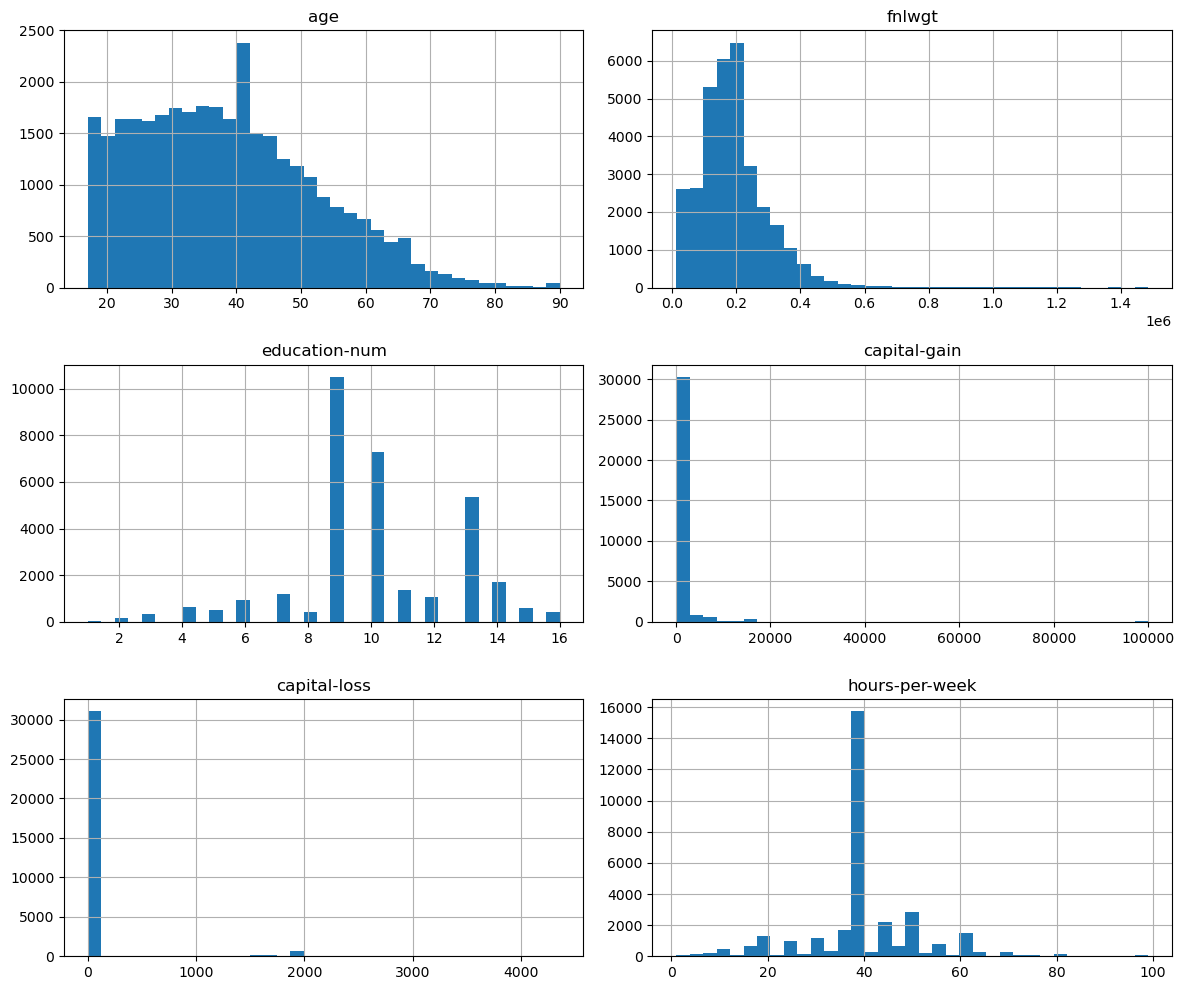

In [765]:
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_features].hist(figsize=(12, 10), bins=35)
plt.tight_layout()
plt.show()

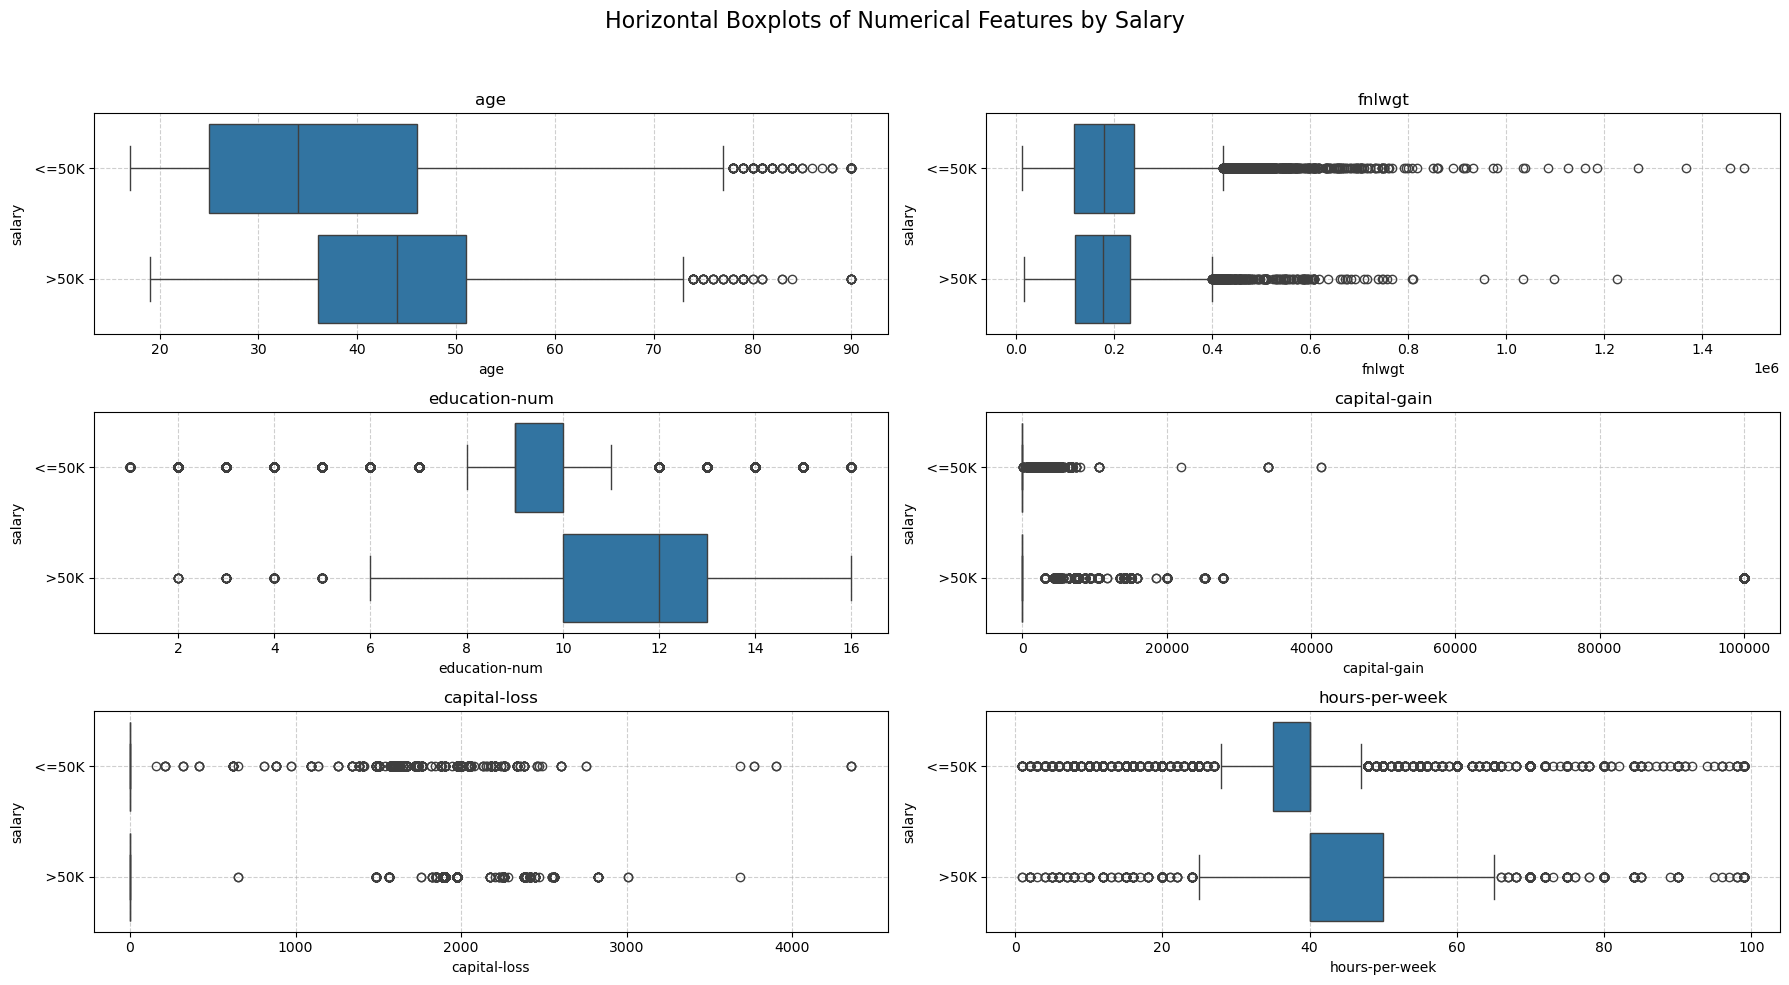

In [766]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.suptitle('Horizontal Boxplots of Numerical Features by Salary', fontsize=16)

for ax, feature in zip(axes.flatten(), numerical_features):
    sns.boxplot(data=df, x=feature, y='salary', ax=ax, orient='h')
    ax.set_title(f'{feature}')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

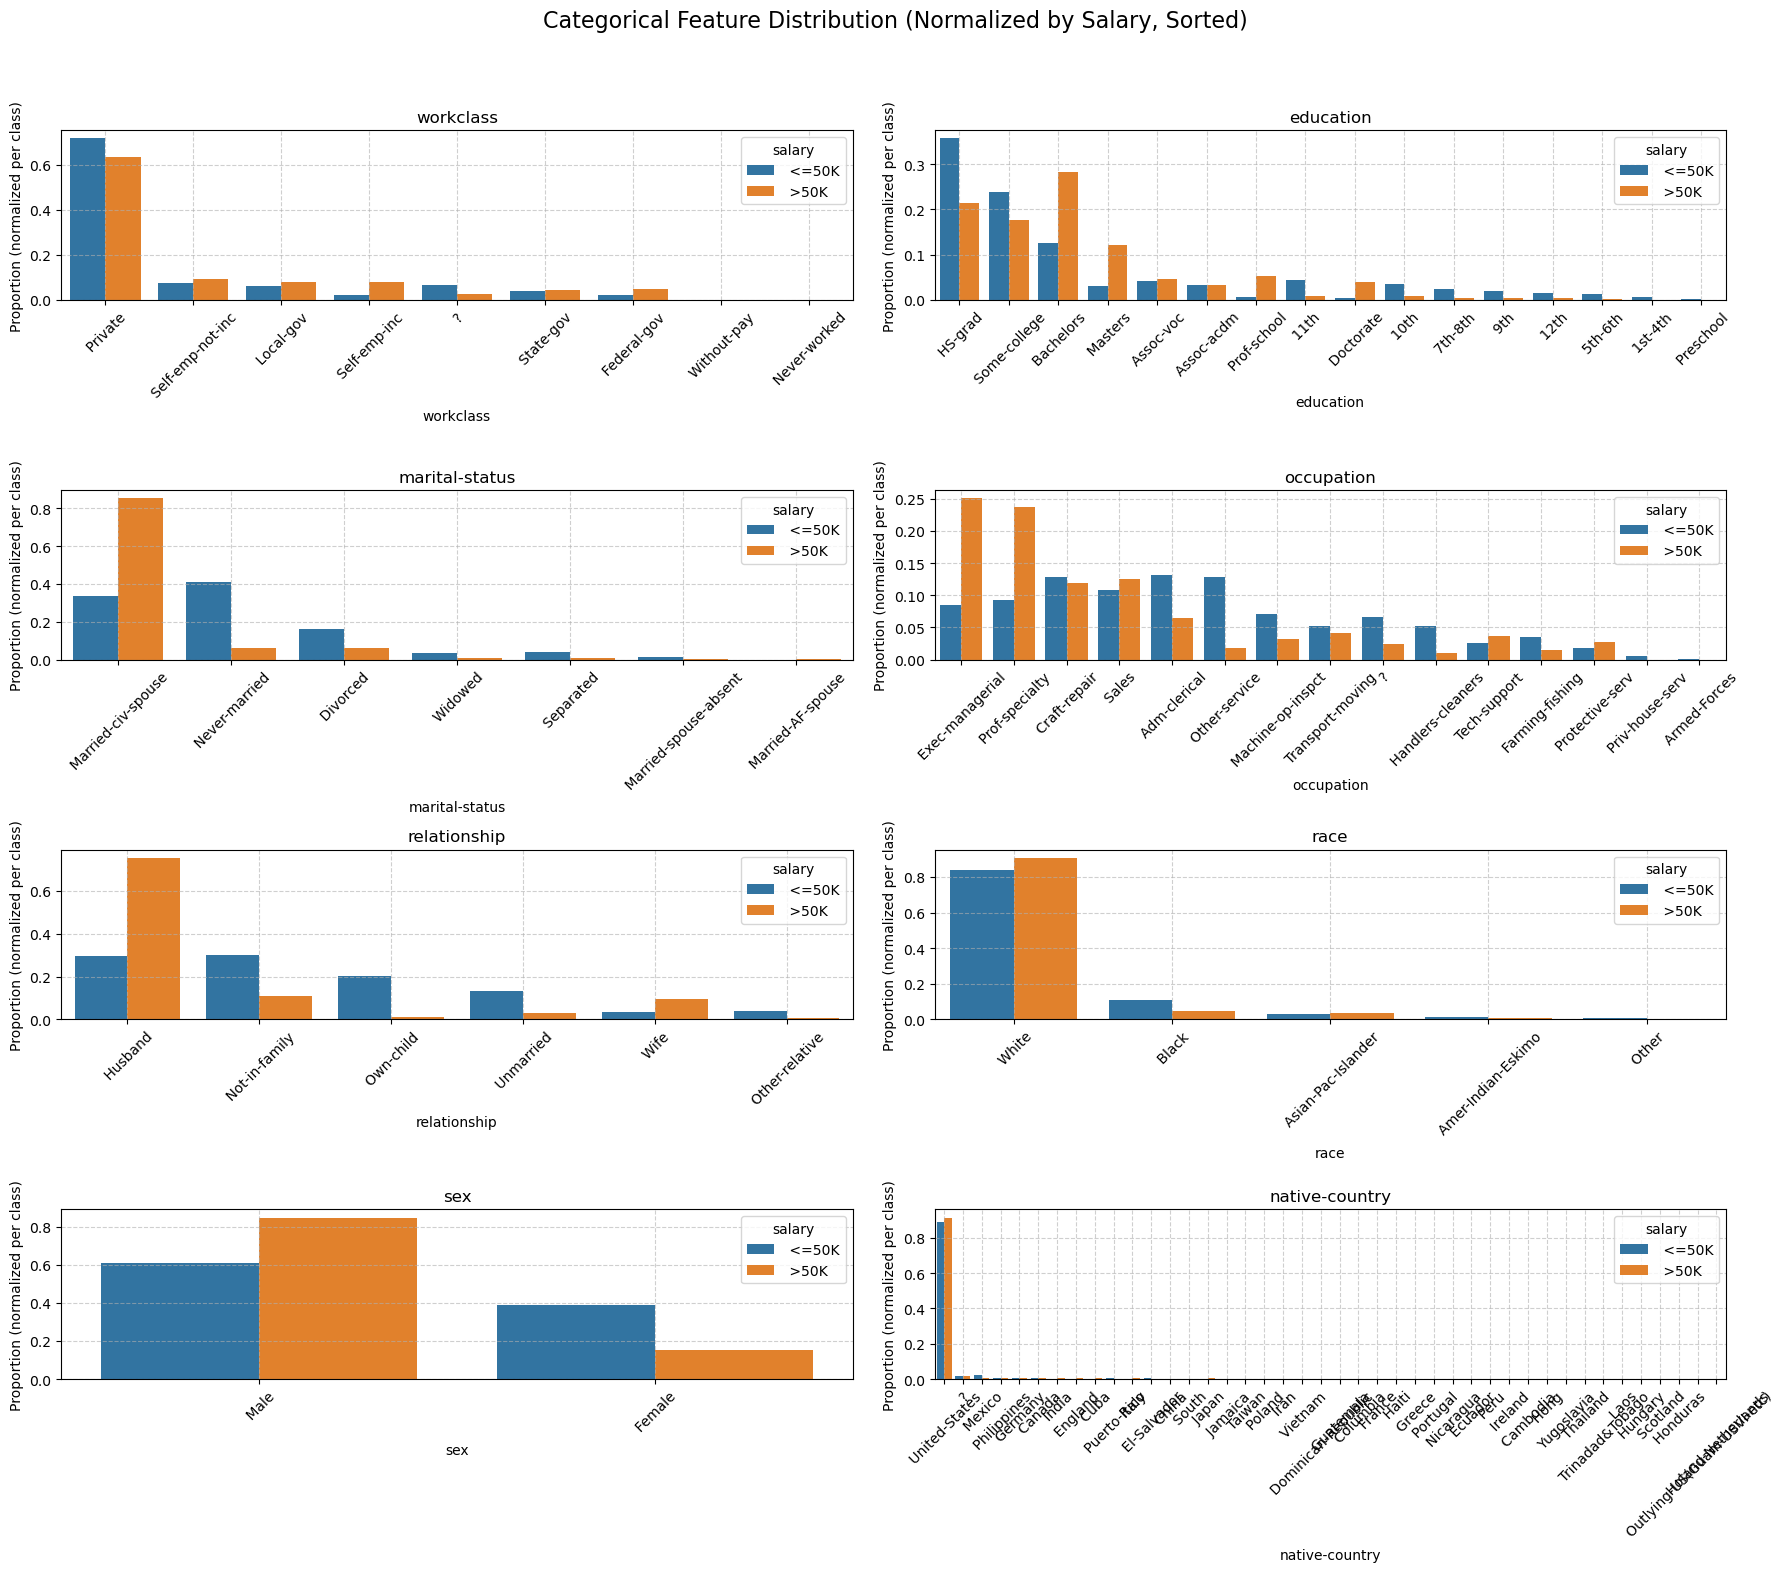

In [767]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country']

n = len(categorical_features)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 4))
fig.suptitle('Categorical Feature Distribution (Normalized by Salary, Sorted)', fontsize=16)

for ax, feature in zip(axes.flatten(), categorical_features):
    prop_df = (
        df.groupby(['salary', feature])
        .size()
        .groupby(level=0)
        .transform(lambda x: x / x.sum())
        .rename('proportion')
        .reset_index()
    )
    
    pivot_df = prop_df.pivot(index=feature, columns='salary', values='proportion').fillna(0)
    
    if '>50K' in pivot_df.columns:
        sorted_categories = pivot_df['>50K'].sort_values(ascending=False).index
    else:
        sorted_categories = pivot_df.sum(axis=1).sort_values(ascending=False).index

    sns.barplot(data=prop_df, x=feature, y='proportion', hue='salary',
                order=sorted_categories, ax=ax)

    ax.set_title(f'{feature}')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_ylabel('Proportion (normalized per class)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

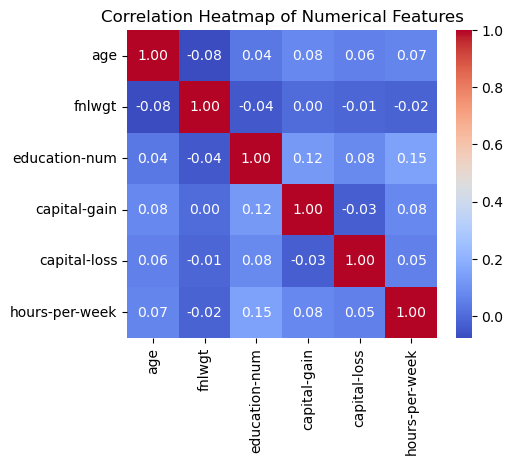

In [768]:
plt.figure(figsize=(5, 4))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## 3. Feature Engineering

In [770]:
df_fe = df.copy()
print("Missing values:\n", df_fe.isnull().sum())
df_fe.head()

Missing values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [771]:
del df_fe['education-num']

df_fe = df_fe.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df_fe['sex'] = df_fe['sex'].map({'Male': 1, 'Female': 0})
df_fe['salary'] = df_fe['salary'].map({'>50K': 1, '<=50K': 0})
df_fe['capital_diff'] = df_fe['capital-gain'] - df_fe['capital-loss']

In [772]:
df_fe['native-country'] = df_fe['native-country'].str.strip()

def map_country_to_region(country):
    latin_america = {
        'Mexico', 'Puerto-Rico', 'Honduras', 'Cuba', 'Jamaica', 'Columbia',
        'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Haiti', 'Nicaragua',
        'Peru', 'Ecuador', 'Trinadad&Tobago'
    }
    asia = {
        'India', 'China', 'Japan', 'Philippines', 'Iran', 'Cambodia', 'Thailand',
        'Laos', 'Vietnam', 'Taiwan', 'Hong'
    }
    europe = {
        'England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 'Ireland',
        'Greece', 'Scotland', 'Yugoslavia', 'Hungary', 'Holand-Netherlands'
    }
    north_america = {
        'United-States', 'Canada'
    }

    if country in latin_america:
        return 'Latin_America'
    elif country in asia:
        return 'Asia'
    elif country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North_America'
    else:
        return 'Other'

df_fe['native_region'] = df_fe['native-country'].apply(map_country_to_region)
print(df_fe[['native_region', 'native-country']].drop_duplicates().sort_values('native_region'))

del df_fe['native-country']

       native_region              native-country
304             Asia                        Laos
311             Asia                      Taiwan
152             Asia                 Philippines
135             Asia                        Iran
873             Asia                       China
265             Asia                    Thailand
1020            Asia                       Japan
2259            Asia                     Vietnam
11              Asia                       India
2655            Asia                        Hong
255             Asia                    Cambodia
1025          Europe                  Yugoslavia
1888          Europe                      Greece
503           Europe                      France
359           Europe                    Portugal
2966          Europe                     Ireland
8562          Europe                     Hungary
1586          Europe                    Scotland
19609         Europe          Holand-Netherlands
217           Europe

In [773]:
df_fe['education'] = df_fe['education'].str.strip()

def map_education_level(edu):
    if edu == 'Preschool':
        return 'Preschool'
    elif edu in ['1st-4th', '5th-6th']:
        return 'Primary_school'
    elif edu in ['7th-8th']:
        return 'Middle_school'
    elif edu in ['9th', '10th', '11th', '12th']:
        return 'Some_high_school'
    elif edu == 'HS-grad':
        return 'High_school_graduate'
    elif edu in ['Some-college', 'Assoc-acdm', 'Assoc-voc']:
        return 'Some_college_or_associate'
    elif edu == 'Bachelors':
        return "Bachelor_degree"
    elif edu in ['Masters', 'Doctorate', 'Prof-school']:
        return 'Advanced_degree'
    else:
        return 'Other'

df_fe['education_group'] = df_fe['education'].apply(map_education_level)
print(df_fe[['education', 'education_group']].drop_duplicates().sort_values('education'))

del df_fe['education']

        education            education_group
77           10th           Some_high_school
3            11th           Some_high_school
415          12th           Some_high_school
160       1st-4th             Primary_school
56        5th-6th             Primary_school
15        7th-8th              Middle_school
6             9th           Some_high_school
13     Assoc-acdm  Some_college_or_associate
14      Assoc-voc  Some_college_or_associate
0       Bachelors            Bachelor_degree
20      Doctorate            Advanced_degree
2         HS-grad       High_school_graduate
5         Masters            Advanced_degree
224     Preschool                  Preschool
52    Prof-school            Advanced_degree
10   Some-college  Some_college_or_associate


In [774]:
df_fe['relationship'] = df_fe['relationship'].str.strip()

unify_map = {
    'Husband': 'Spouse',
    'Wife': 'Spouse',
    'Unmarried': 'Non-family',
    'Not-in-family': 'Non-family'
}

df_fe['relationship'] = df_fe['relationship'].replace(unify_map)
print(df_fe[['marital-status', 'relationship']].drop_duplicates().sort_values('marital-status'))

              marital-status    relationship
2                   Divorced      Non-family
233                 Divorced  Other-relative
32                  Divorced       Own-child
13034      Married-AF-spouse  Other-relative
11481      Married-AF-spouse       Own-child
37         Married-AF-spouse          Spouse
1172      Married-civ-spouse      Non-family
74        Married-civ-spouse  Other-relative
1         Married-civ-spouse          Spouse
33        Married-civ-spouse       Own-child
6      Married-spouse-absent      Non-family
485    Married-spouse-absent       Own-child
766    Married-spouse-absent  Other-relative
12             Never-married       Own-child
110            Never-married  Other-relative
0              Never-married      Non-family
21                 Separated      Non-family
71                 Separated       Own-child
159                Separated  Other-relative
147                  Widowed      Non-family
1223                 Widowed       Own-child
1710      

In [775]:
one_hot_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native_region', 'education_group']
df_fe = pd.get_dummies(df_fe, columns=one_hot_cols, drop_first=True).astype(int)

# df_fe['age_bin'] = pd.cut(df_fe['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elder'])
# df_fe['work_hours_bin'] = pd.cut(df_fe['hours-per-week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

# df_fe = pd.get_dummies(df_fe, columns=['age_bin', 'work_hours_bin'], drop_first=True).astype(int)

In [776]:
df_fe.head()

,age,fnlwgt,sex,capital-gain,capital-loss,hours-per-week,salary,capital_diff,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Other-relative,relationship_Own-child,relationship_Spouse,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_region_Europe,native_region_Latin_America,native_region_North_America,native_region_Other,education_group_Bachelor_degree,education_group_High_school_graduate,education_group_Middle_school,education_group_Preschool,education_group_Primary_school,education_group_Some_college_or_associate,education_group_Some_high_school
0,39,77516,1,2174,0,40,0,2174,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,50,83311,1,0,0,13,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,38,215646,1,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,53,234721,1,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,28,338409,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0


In [777]:
df_fe.shape

(32561, 54)

In [778]:
def phi_coefficient(x, y):
    """Compute the Phi coefficient between two binary variables."""
    contingency = pd.crosstab(x, y)
    if contingency.shape != (2, 2):
        return np.nan
    chi2, _, _, _ = chi2_contingency(contingency, correction=False)
    n = contingency.sum().sum()
    return np.sqrt(chi2 / n)

def compute_phi_correlation_table(df, threshold=0.4):
    binary_cols = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]
    binary_df = df[binary_cols]

    records = []
    for i, col1 in enumerate(binary_cols):
        for col2 in binary_cols[i+1:]:
            phi = phi_coefficient(binary_df[col1], binary_df[col2])
            if pd.notna(phi) and abs(phi) >= threshold:
                records.append({
                    'feature1': col1,
                    'feature2': col2,
                    'correlation': phi
                })
    df_corr = pd.DataFrame(records)
    df_corr = df_corr.reindex(df_corr['correlation'].abs().sort_values(ascending=False).index)
    return df_corr

phi_corr_matrix = compute_phi_correlation_table(df_fe)
display(phi_corr_matrix)

,feature1,feature2,correlation
6,marital-status_Married-civ-spouse,relationship_Spouse,0.984182
10,race_Black,race_White,0.788747
5,marital-status_Married-civ-spouse,marital-status_Never-married,0.644866
8,marital-status_Never-married,relationship_Spouse,0.636342
11,native_region_Latin_America,native_region_North_America,0.634620
7,marital-status_Never-married,relationship_Own-child,0.509226
13,education_group_High_school_graduate,education_group_Some_college_or_associate,0.450739
3,salary,relationship_Spouse,0.448496
2,salary,marital-status_Married-civ-spouse,0.444696
4,workclass_Private,workclass_Self-emp-not-inc,0.441289


In [779]:
del df_fe['relationship_Spouse']
del df_fe['race_White']
del df_fe['relationship_Own-child']
del df_fe['marital-status_Never-married']

In [780]:
phi_corr_matrix = compute_phi_correlation_table(df_fe)
display(phi_corr_matrix)

,feature1,feature2,correlation
3,native_region_Latin_America,native_region_North_America,0.634620
5,education_group_High_school_graduate,education_group_Some_college_or_associate,0.450739
1,salary,marital-status_Married-civ-spouse,0.444696
2,workclass_Private,workclass_Self-emp-not-inc,0.441289
4,native_region_North_America,native_region_Other,0.436115
0,sex,marital-status_Married-civ-spouse,0.431805


## 4. Models with Relations Features

In [840]:
X = df_fe.drop(columns=['salary'])
y = df_fe['salary']

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.122, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.14, random_state=42, stratify=y_train_full
)

print('Number of observations')
print('Train:', len(X_train))
print('Validation:', len(X_val))
print('Test:', len(X_test))

Number of observations
Train: 24585
Validation: 4003
Test: 3973


In [783]:
def evaluate_binary_classifier(model, threshold, X_train, y_train, X_test, y_test):
    """
    Evaluates a binary classification model using AUC ROC, classification report,
    confusion matrix, and ROC curve.

    Parameters:
        model: Trained binary classification model with `predict_proba` and `predict`.
        X_train, y_train: Training features and labels.
        X_test, y_test: Test features and labels.
    """

    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    print('Train AUC ROC:', roc_auc_score(y_train, y_train_proba))
    print('Test AUC ROC:', roc_auc_score(y_test, y_test_proba))

    y_test_pred = (y_test_proba >= threshold).astype(int)
    
    print("\nClassification Report (Test Data):")
    print(classification_report(y_test, y_test_pred))

    print("Confusion Matrix (Test Data):")
    print(confusion_matrix(y_test, y_test_pred))

    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.grid(True)
    plt.show()

In [784]:
def optimize_threshold_for_f1(model, X_val, y_val, plot=True):
    """
    Finds the optimal probability threshold for maximizing F1 score.

    Parameters:
        model: Trained classifier with predict_proba method.
        X_val: Validation or test features.
        y_val: Ground truth binary labels.
        plot: Whether to display F1 vs. threshold curve.

    Returns:
        best_threshold: Threshold that maximizes F1 score.
        best_f1: Maximum F1 score.
    """

    y_probs = model.predict_proba(X_val)[:, 1]

    thresholds = np.linspace(0, 1, 200)
    f1_scores = []

    for t in thresholds:
        y_pred = (y_probs >= t).astype(int)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    best_index = np.argmax(f1_scores)
    best_threshold = thresholds[best_index]
    best_f1 = f1_scores[best_index]

    print(f"Best Threshold: {best_threshold:.3f}")
    print(f"Best F1 Score: {best_f1:.4f}")

    if plot:
        import matplotlib.pyplot as plt
        plt.plot(thresholds, f1_scores, label='F1 Score')
        plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
        plt.xlabel('Threshold')
        plt.ylabel('F1 Score')
        plt.title('F1 Score vs. Decision Threshold')
        plt.legend()
        plt.grid(True)
        plt.show()

    return best_threshold, best_f1

In [785]:
def plot_feature_importance(model, feature_names, top_n=20, title='Feature Importance'):
    """
    Plots the top N most important features for a tree-based model.

    Parameters:
    - model: Trained tree-based model with `feature_importances_` attribute.
    - feature_names: List of feature names used for training.
    - top_n: Number of top features to display (default=20).
    - title: Title for the plot.
    """

    if not hasattr(model, "feature_importances_"):
        raise ValueError("Model does not have feature_importances_ attribute.")

    importance = model.feature_importances_
    feat_importance = pd.Series(importance, index=feature_names)
    top_features = feat_importance.sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.xlabel('Importance Score')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

### 4.1. Decision Tree

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 30, 'max_features': 0.5, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best Threshold: 0.608
Best F1 Score: 0.6723


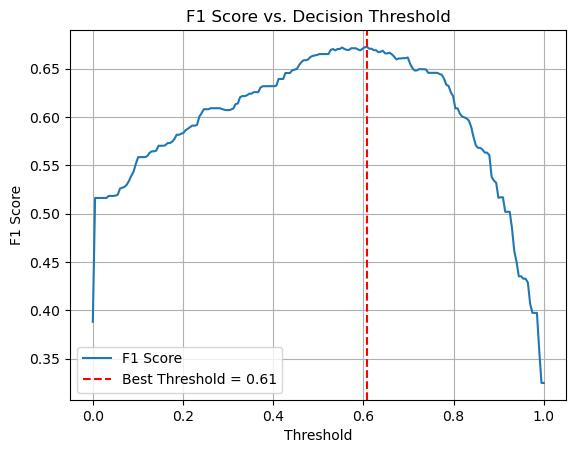

Best threshold: 0.6080402010050251
Best f1: 0.67233238904627

Train AUC ROC: 0.925356449236539
Test AUC ROC: 0.9090671763828719

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      3016
           1       0.64      0.79      0.70       957

    accuracy                           0.84      3973
   macro avg       0.78      0.82      0.80      3973
weighted avg       0.86      0.84      0.85      3973

Confusion Matrix (Test Data):
[[2586  430]
 [ 204  753]]


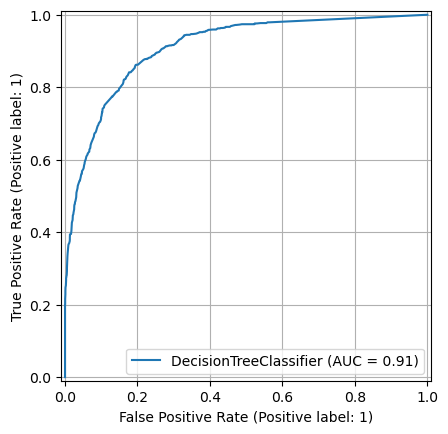

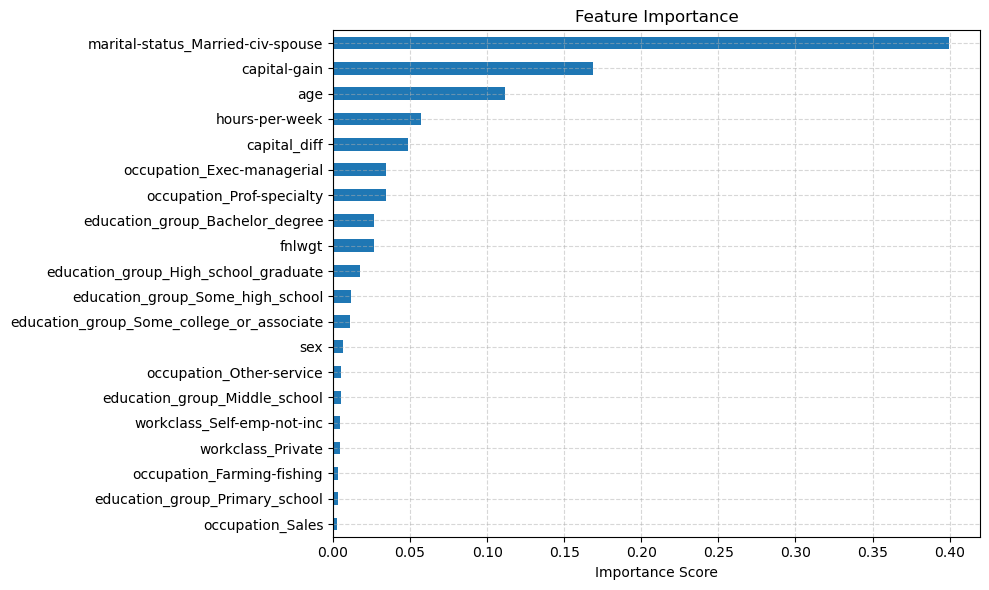

In [787]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [15, 20, 25, 30],
    'min_samples_split': [15, 20, 25, 30],
    'min_samples_leaf': [15, 20, 30],
    'max_features': [None, 'sqrt', 'log2', 0.3, 0.5, 0.7],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': ['balanced']
}

dt_random_search = RandomizedSearchCV(estimator=dt,
                                      param_distributions=param_dist,
                                      scoring='roc_auc',
                                      n_iter=100,
                                      cv=4,
                                      verbose=1,
                                      random_state=42,
                                      n_jobs=-1)

dt_random_search.fit(X_train, y_train)

best_model = dt_random_search.best_estimator_
print("Best Parameters:", dt_random_search.best_params_)

best_threshold, best_f1 = optimize_threshold_for_f1(best_model, X_val, y_val)
print('Best threshold:' , best_threshold)
print('Best f1:' , best_f1)
print()

evaluate_binary_classifier(best_model, best_threshold, X_train, y_train, X_test, y_test)

plot_feature_importance(best_model, X_train.columns, top_n=20)

### 4.2. Random Forest

Fitting 4 folds for each of 100 candidates, totalling 400 fits


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 400, 'min_samples_split': 30, 'min_samples_leaf': 15, 'max_features': 0.3, 'max_depth': 30, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best Threshold: 0.638
Best F1 Score: 0.7026


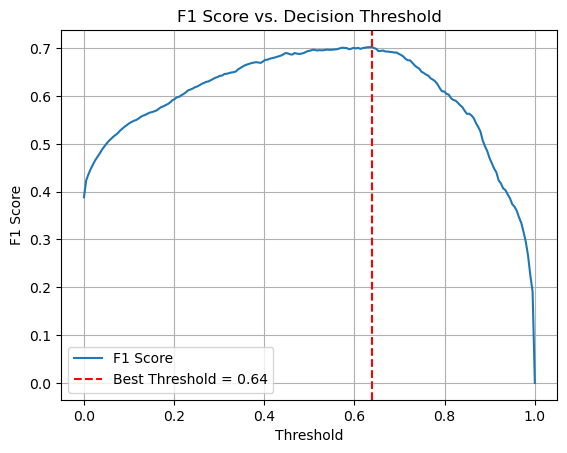

Best threshold: 0.6381909547738693
Best f1: 0.7026466009340945

Train AUC ROC: 0.939715227047299
Test AUC ROC: 0.9276841866021416

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3016
           1       0.73      0.73      0.73       957

    accuracy                           0.87      3973
   macro avg       0.82      0.82      0.82      3973
weighted avg       0.87      0.87      0.87      3973

Confusion Matrix (Test Data):
[[2754  262]
 [ 262  695]]


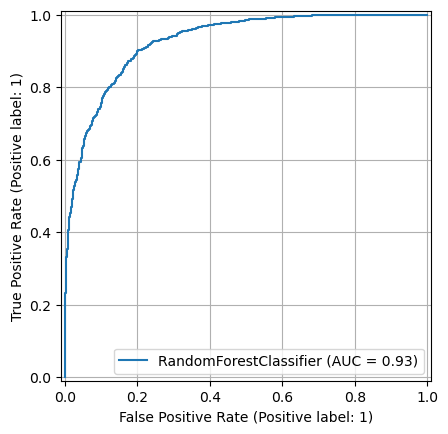

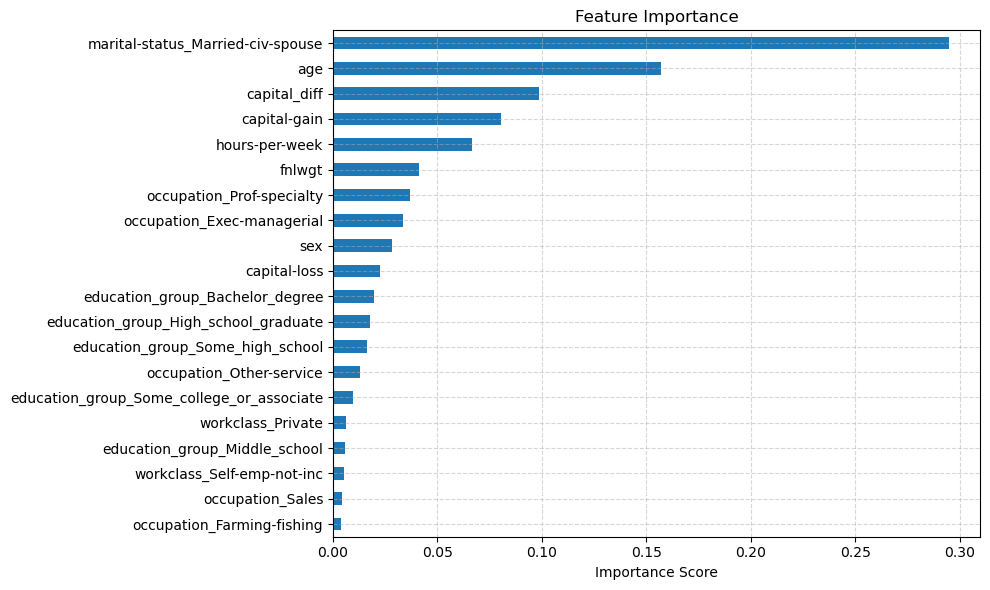

In [789]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [10, 25, 50, 100, 250, 400, 500],
    'max_depth': [15, 20, 25, 30],
    'min_samples_split': [15, 20, 25, 30],
    'min_samples_leaf': [15, 20, 30],
    'max_features': [None, 'sqrt', 'log2', 0.3, 0.5, 0.7],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': ['balanced']
}

rf_random_search = RandomizedSearchCV(estimator=rf,
                                      param_distributions=param_dist,
                                      scoring='roc_auc',
                                      n_iter=100,
                                      cv=4,
                                      verbose=1,
                                      random_state=42,
                                      n_jobs=-1)

rf_random_search.fit(X_train, y_train)

best_model = rf_random_search.best_estimator_
print("Best Parameters:", rf_random_search.best_params_)

best_threshold, best_f1 = optimize_threshold_for_f1(best_model, X_val, y_val)
print('Best threshold:', best_threshold)
print('Best f1:', best_f1)
print()

evaluate_binary_classifier(best_model, best_threshold, X_train, y_train, X_test, y_test)

plot_feature_importance(best_model, X_train.columns, top_n=20)

### 4.3. XGBoost

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 10, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
Best Threshold: 0.337
Best F1 Score: 0.7251


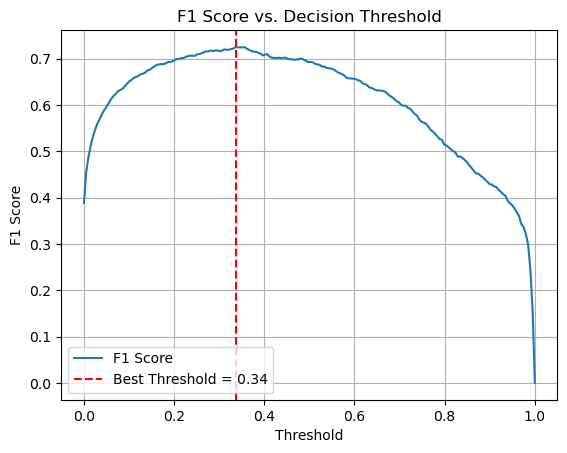

Best threshold: 0.33668341708542715
Best f1: 0.7250842561386616

Train AUC ROC: 0.9584255652652384
Test AUC ROC: 0.9328610351202503

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3016
           1       0.70      0.81      0.75       957

    accuracy                           0.87      3973
   macro avg       0.82      0.85      0.83      3973
weighted avg       0.88      0.87      0.87      3973

Confusion Matrix (Test Data):
[[2689  327]
 [ 186  771]]


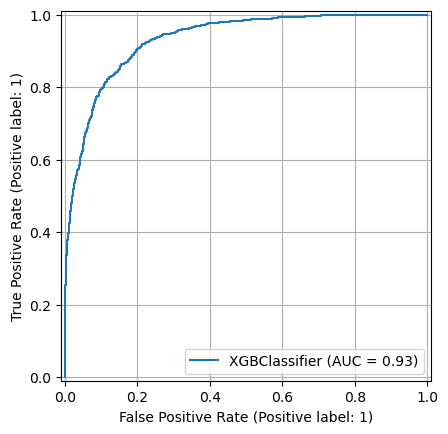

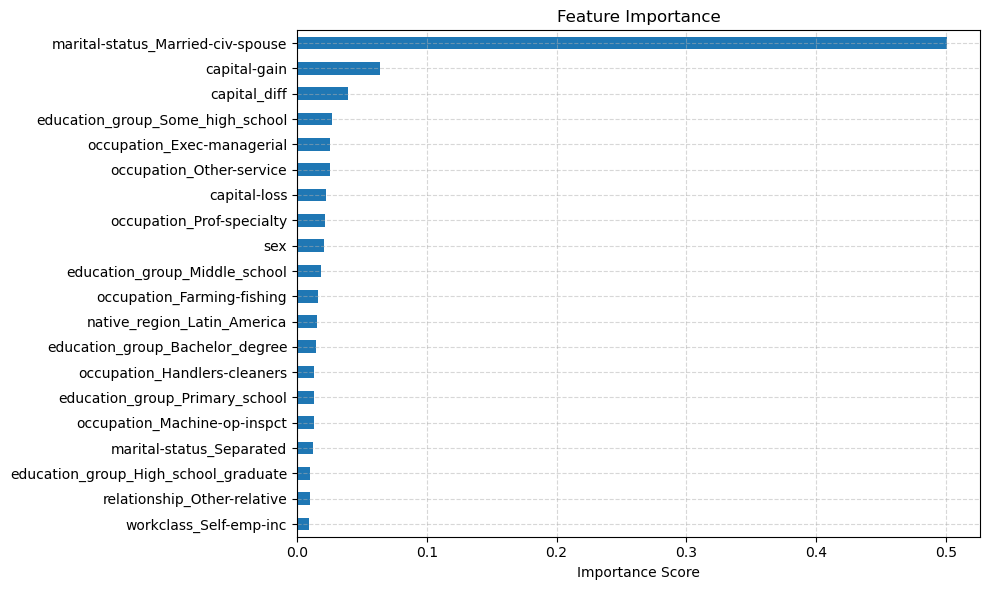

In [791]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [15, 20, 25, 30],
    'min_child_weight': [1, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'scale_pos_weight': [1, sum(y_train==0)/sum(y_train==1)]
}

xgb_random_search = RandomizedSearchCV(estimator=xgb,
                                       param_distributions=param_dist,
                                       scoring='roc_auc',
                                       n_iter=100,
                                       cv=4,
                                       random_state=42,
                                       n_jobs=-1)

xgb_random_search.fit(X_train, y_train)

best_model = xgb_random_search.best_estimator_
print("Best Parameters:", xgb_random_search.best_params_)

best_threshold, best_f1 = optimize_threshold_for_f1(best_model, X_val, y_val)
print('Best threshold:', best_threshold)
print('Best f1:', best_f1)
print()

evaluate_binary_classifier(best_model, best_threshold, X_train, y_train, X_test, y_test)

plot_feature_importance(best_model, X_train.columns, top_n=20)

## 5. Models without Relations Features

In [793]:
cols = [
    'marital-status_Married-AF-spouse',
    'marital-status_Married-civ-spouse',
    'marital-status_Married-spouse-absent',
    'marital-status_Separated',
    'marital-status_Widowed',
    'relationship_Other-relative'
]

df_fe.drop(columns=cols, inplace=True)
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        32561 non-null  int64
 1   fnlwgt                                     32561 non-null  int64
 2   sex                                        32561 non-null  int64
 3   capital-gain                               32561 non-null  int64
 4   capital-loss                               32561 non-null  int64
 5   hours-per-week                             32561 non-null  int64
 6   salary                                     32561 non-null  int64
 7   capital_diff                               32561 non-null  int64
 8   workclass_Federal-gov                      32561 non-null  int64
 9   workclass_Local-gov                        32561 non-null  int64
 10  workclass_Never-worked                     325

In [839]:
X = df_fe.drop(columns=['salary'])
y = df_fe['salary']

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.122, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.14, random_state=42, stratify=y_train_full
)

print('Number of observations')
print('Train:', len(X_train))
print('Validation:', len(X_val))
print('Test:', len(X_test))

Number of observations
Train: 24585
Validation: 4003
Test: 3973


### 5.1. Random Forest

Fitting 4 folds for each of 100 candidates, totalling 400 fits


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 500, 'min_samples_split': 30, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best Threshold: 0.583
Best F1 Score: 0.6419


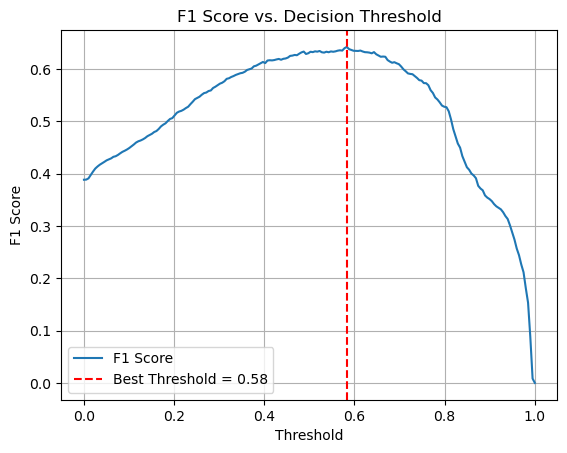

Best threshold: 0.5829145728643216
Best f1: 0.6418884982420894

Train AUC ROC: 0.9039263082731808
Test AUC ROC: 0.8889307531548911

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3016
           1       0.66      0.69      0.67       957

    accuracy                           0.84      3973
   macro avg       0.78      0.79      0.78      3973
weighted avg       0.84      0.84      0.84      3973

Confusion Matrix (Test Data):
[[2676  340]
 [ 299  658]]


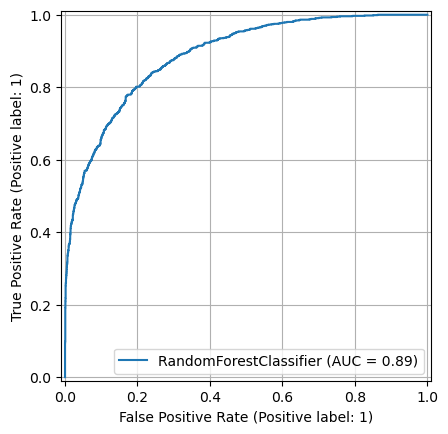

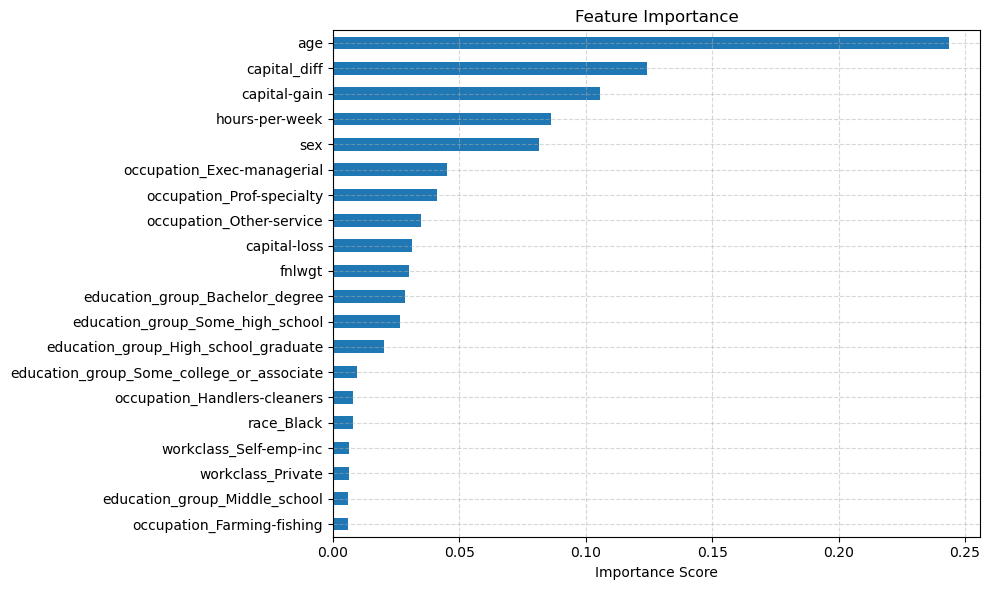

In [796]:
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [10, 25, 50, 100, 250, 400, 500],
    'max_depth': [15, 20, 25, 30],
    'min_samples_split': [15, 20, 25, 30],
    'min_samples_leaf': [15, 20, 30],
    'max_features': [None, 'sqrt', 'log2', 0.3, 0.5, 0.7],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': ['balanced']
}

rf_random_search_v1 = RandomizedSearchCV(estimator=rf,
                                      param_distributions=param_dist,
                                      scoring='roc_auc',
                                      n_iter=100,
                                      cv=4,
                                      verbose=1,
                                      random_state=42,
                                      n_jobs=-1)

rf_random_search_v1.fit(X_train, y_train)

best_model = rf_random_search_v1.best_estimator_
print("Best Parameters:", rf_random_search_v1.best_params_)

best_threshold, best_f1 = optimize_threshold_for_f1(best_model, X_val, y_val)
print('Best threshold:', best_threshold)
print('Best f1:', best_f1)
print()

evaluate_binary_classifier(best_model, best_threshold, X_train, y_train, X_test, y_test)

plot_feature_importance(best_model, X_train.columns, top_n=20)

### 5.2. XGBoost

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 10, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
Best Threshold: 0.312
Best F1 Score: 0.6667


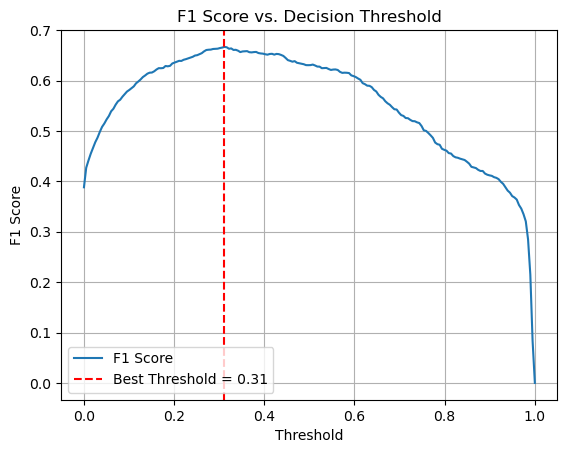

Best threshold: 0.31155778894472363
Best f1: 0.6666666666666666

Train AUC ROC: 0.9399101648192527
Test AUC ROC: 0.8966729861497995

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3016
           1       0.64      0.74      0.69       957

    accuracy                           0.84      3973
   macro avg       0.78      0.80      0.79      3973
weighted avg       0.85      0.84      0.84      3973

Confusion Matrix (Test Data):
[[2624  392]
 [ 252  705]]


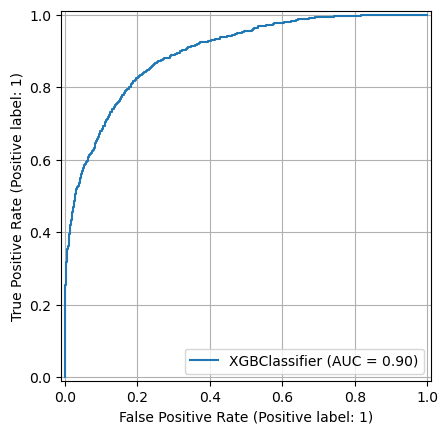

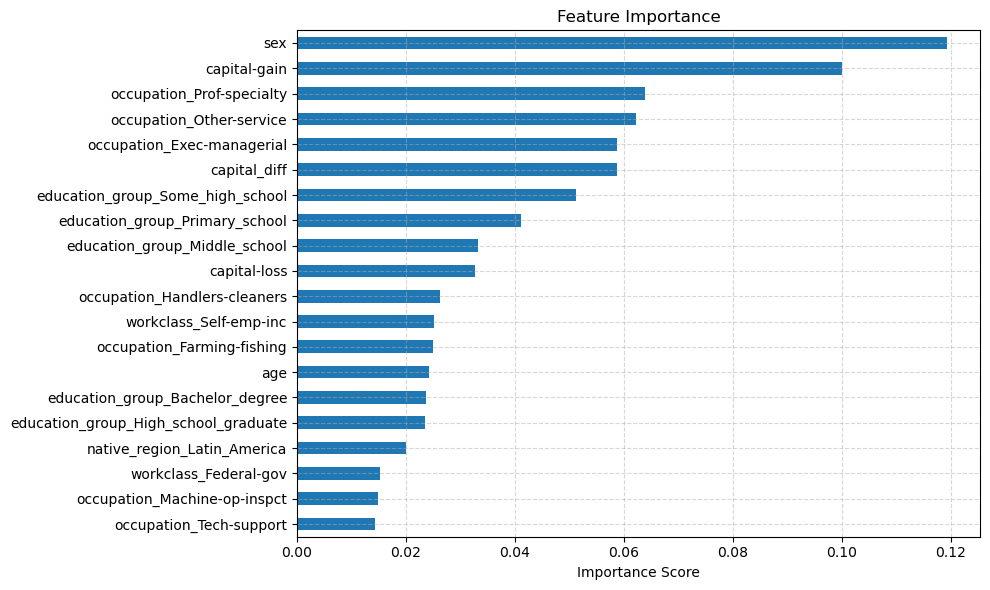

In [798]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [15, 20, 25, 30],
    'min_child_weight': [1, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'scale_pos_weight': [1, sum(y_train==0)/sum(y_train==1)]
}

xgb_random_search_v1 = RandomizedSearchCV(estimator=xgb,
                                       param_distributions=param_dist,
                                       scoring='roc_auc',
                                       n_iter=100,
                                       cv=4,
                                       random_state=42,
                                       n_jobs=-1)

xgb_random_search_v1.fit(X_train, y_train)

best_model = xgb_random_search_v1.best_estimator_
print("Best Parameters:", xgb_random_search_v1.best_params_)

best_threshold, best_f1 = optimize_threshold_for_f1(best_model, X_val, y_val)
print('Best threshold:', best_threshold)
print('Best f1:', best_f1)
print()

evaluate_binary_classifier(best_model, best_threshold, X_train, y_train, X_test, y_test)

plot_feature_importance(best_model, X_train.columns, top_n=20)